In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
font = {'family' : 'serif',
        'size'   : 22}

matplotlib.rc('font', **font)
np.set_printoptions(precision=3, linewidth=200, suppress=True)

## Load data

In [3]:
real_data = np.load('real_data.npz')
sim_data = np.load('sim_data.npz')

print (sim_data.files)
print (real_data.files)

['measured_positions', 'measured_velocities', 'desired_torques', 'desired_positions', 'desired_velocities', 'time', 'x_pos', 'y_pos']
['measured_positions', 'measured_velocities', 'desired_torques', 'desired_positions', 'desired_velocities', 'time', 'x_pos', 'y_pos']


## Plots

Points will be subtracted if the plots do not include
- Axis labels
- Units
- Line legends

### Positions

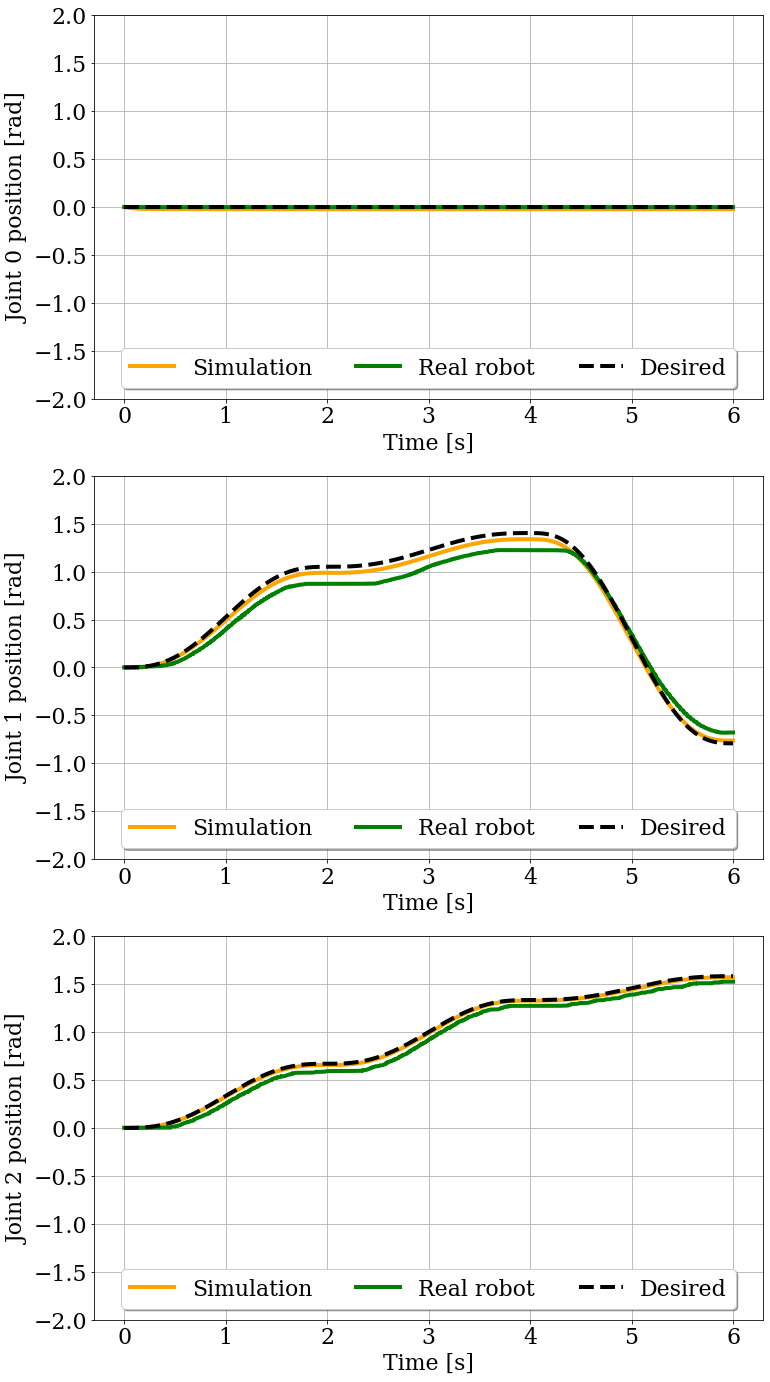

In [16]:
nj = 3
fig, ax = plt.subplots(nj, 1, figsize=(12, 8*nj))
labels = ['Joint 0', 'Joint 1', 'Joint 2']

for i in range(nj):
    ax[i].plot(sim_data['time'], sim_data['measured_positions'][:, i], 
               lw=4, color='orange',
               label='Simulation')
    ax[i].plot(real_data['time'], real_data['measured_positions'][:, i], 
               lw=4, color='green',
               label='Real robot')
    ax[i].plot(sim_data['time'], sim_data['desired_positions'][:, i], 
               lw=4, ls='--', color='black',
               label='Desired')
    
    ax[i].grid()
    ax[i].set_xlabel('Time [s]')
    ax[i].set_ylabel(f'Joint {i} position [rad]' )
    ax[i].set_ylim([-2,2])
    _ = ax[i].legend(loc='lower center', ncol=3, fancybox=True, shadow=True)

### Velocities

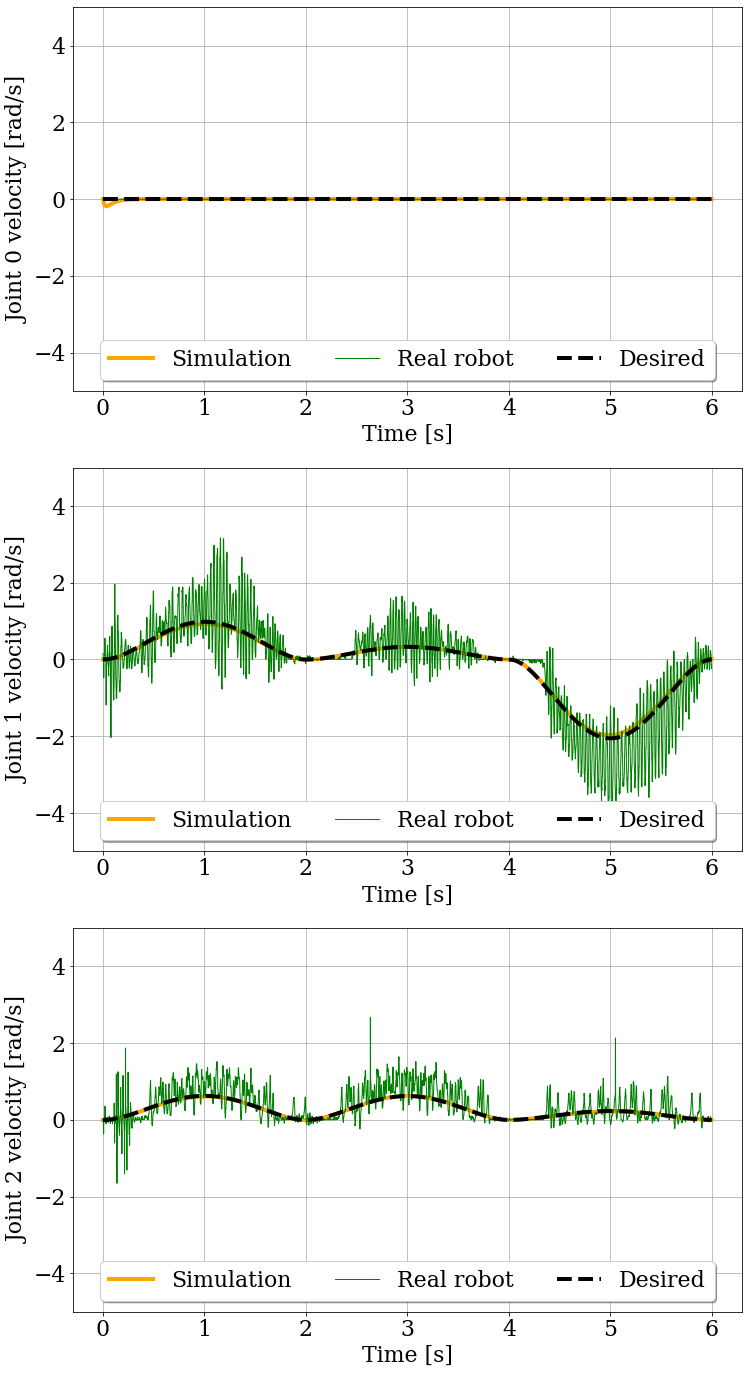

In [14]:
nj = 3
fig, ax = plt.subplots(nj, 1, figsize=(12, 8*nj))
labels = ['Joint 0', 'Joint 1', 'Joint 2']

for i in range(nj):
    ax[i].plot(sim_data['time'], sim_data['measured_velocities'][:, i], 
               lw=4, color='orange',
               label='Simulation')
    ax[i].plot(real_data['time'], real_data['measured_velocities'][:, i], 
               lw=1, color='green',
               label='Real robot')
    ax[i].plot(sim_data['time'], sim_data['desired_velocities'][:, i], 
               lw=4, ls='--', color='black',
               label='Desired')
    
    ax[i].grid()
    ax[i].set_xlabel('Time [s]')
    ax[i].set_ylabel(f'Joint {i} velocity [rad/s]' )
    ax[i].set_ylim([-5,5])
    _ = ax[i].legend(loc='lower center', ncol=3, fancybox=True, shadow=True)

### Torques

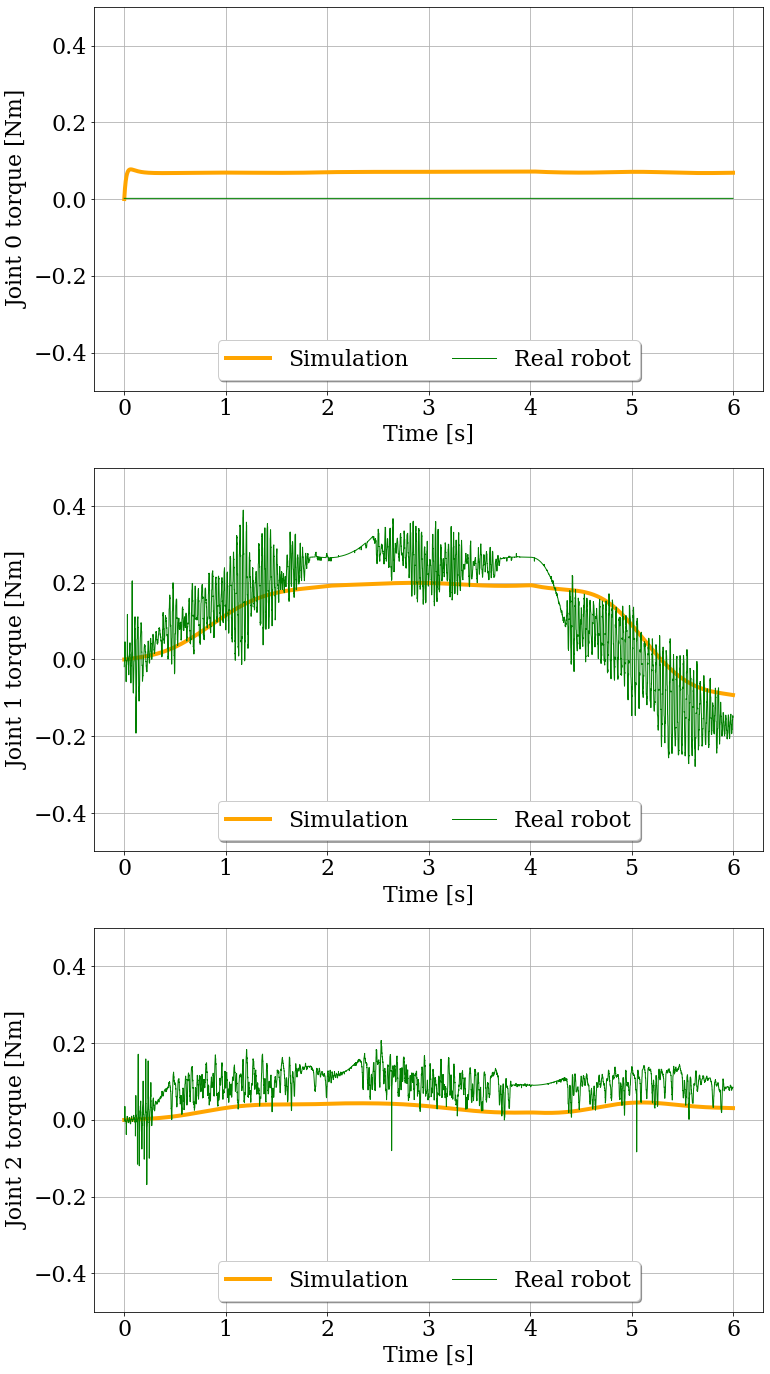

In [21]:
nj = 3
fig, ax = plt.subplots(nj, 1, figsize=(12, 8*nj))
labels = ['Joint 0', 'Joint 1', 'Joint 2']

for i in range(nj):
    ax[i].plot(sim_data['time'], sim_data['desired_torques'][:, i], 
               lw=4, color='orange',
               label='Simulation')
    ax[i].plot(real_data['time'], real_data['desired_torques'][:, i], 
               lw=1, color='green',
               label='Real robot')
    
    ax[i].grid()
    ax[i].set_xlabel('Time [s]')
    ax[i].set_ylabel(f'Joint {i} torque [Nm]' )
    ax[i].set_ylim([-.5,.5])
    _ = ax[i].legend(loc='lower center', ncol=3, fancybox=True, shadow=True)

## Comparison & Discussion

Following factors contribute to the discrepancy between the simulation and the real robot experiment:

- **Imperfect sensor & signal processing**: While we can read out the joint positions perfectly in simulation, we have to rely on sensors in the real world—oftentimes noisy—to measure the joint positions. Joint encoders introduce resolution-dependent noise in their measurements, which are usually not too large as can be observed in the position plots.
However, when we compute the velocities from the position measurements, we essentially amplify the high-frequency noise in the signal since we are taking derivatives. Recall for Laplace transform, we have 
$$\frac{\partial}{\partial t} \rightarrow s,$$ Hence, differentiation in the time domain is equivalent to multiplication by $s$ in the $s$-domain. The higher the frequency is, the higher $|s|$ as well as the corresponding noise component becomes. Since the PD controller computes the desired torque based on velocity measurements, the velocity noise naturally enters into the desired torque.

- **Different PD gains**: In addition, the PD controller we use on the real robot does not share the same PD gains as the one used in simulation, which explains the difference in the desired torque. Furthermore, since the P gains on the real robot are lower than the simulated one, the tracking of the positions is also less precise. Note that the desired torque is **not** the actual torque applied to the robot, thus it does not reflect how the real actuators differ from the ideal ones in simulation, though it could very likely be the case.

- **Unmodeled dynamics**: Finally, another factor that contributes to the imperfect tracking of the desired positions using PD controllers can come from the unmodeled dynamic effects in the joints, links, and actuators, which include but are not limited to damping, friction, stiction, and external disturbances from the environment.